----------------

```{admonition} Learning Objectives
- Create mosaics from multiple raster files using rioxarray.merge
- Understand different merge methods and their applications
- Handle overlapping raster data with various combination strategies
- Work with raster bounds and spatial extents

```
----------------

# Handling Multiple Remotely Sensed Images with Rioxarray

Analysis over larger geographic areas often requires combining multiple raster images into seamless mosaics. Rioxarray provides efficient mosaicking capabilities through the `rioxarray.merge.merge_arrays()` function, which can handle overlapping raster data with different combination methods.

## Creating Raster Mosaics with Union Bounds

The `merge_arrays()` function combines multiple raster datasets into a single array. By default, it uses union bounds (combining the full extent of all input rasters). For overlapping areas, you can specify different methods like 'first', 'last', 'min', 'max', or 'mean' to determine which values to use.

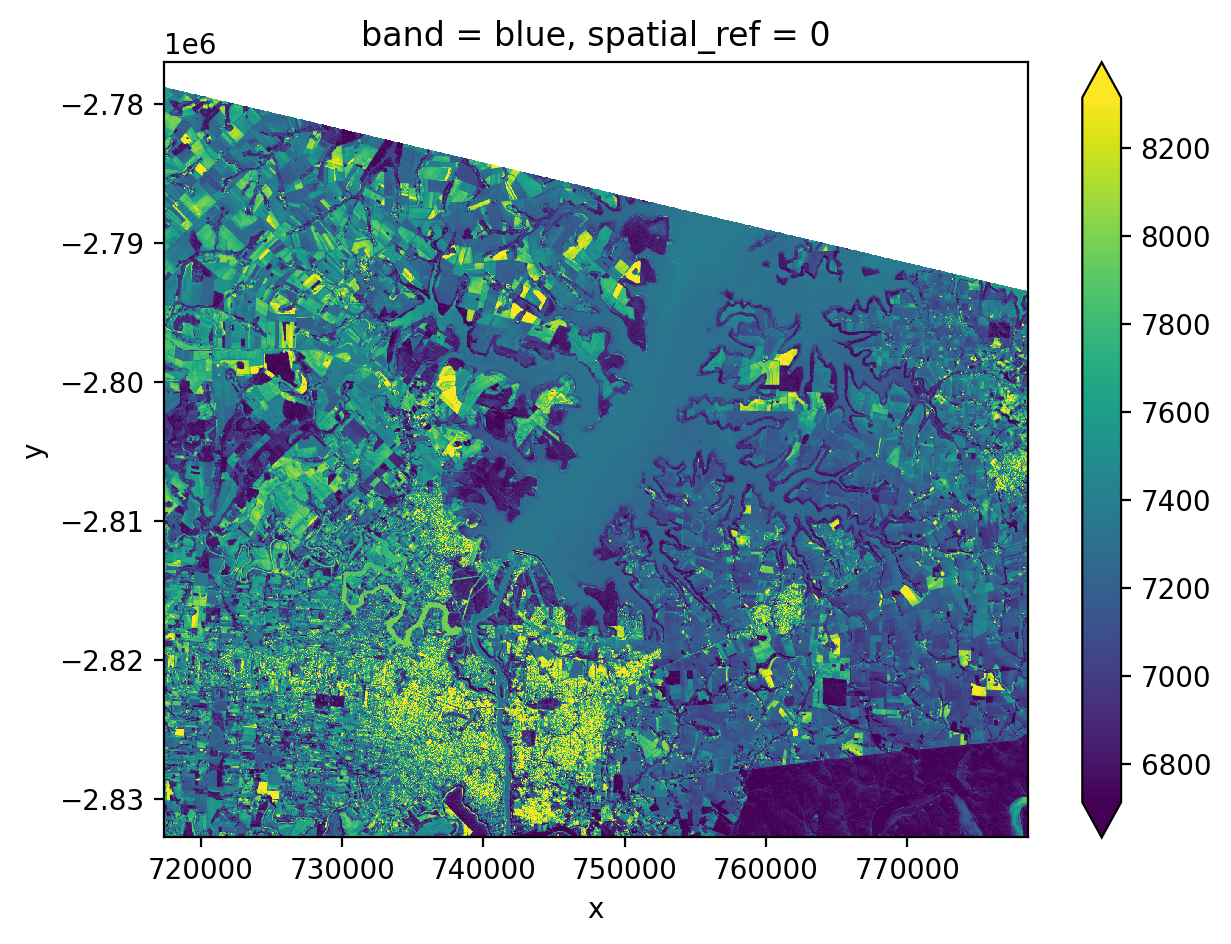

In [1]:
import rioxarray as rxr
import rioxarray.merge
import matplotlib.pyplot as plt

image_path = "../../pygis/data/LC08_L1TP_224078_20200518_20200518_01_RT.TIF"

fig, ax = plt.subplots(dpi=200)

# Simulate two files by using the same file twice and extracting blue band
src1 = rxr.open_rasterio(image_path).isel(band=1).assign_coords(band='blue')
src2 = rxr.open_rasterio(image_path).isel(band=1).assign_coords(band='blue')

# Mosaic with union bounds (default behavior)
src = rioxarray.merge.merge_arrays([src1, src2], method='first')

# Remove 0 values and plot
src.where(src != 0).plot.imshow(robust=True, ax=ax)
plt.tight_layout(pad=1)

## Handling Overlapping Areas with Different Methods

When raster files overlap, you need to decide how to combine pixel values in the overlapping regions. The `method` parameter in `merge_arrays()` controls this behavior. Here we demonstrate using the 'max' method, which takes the maximum value where rasters overlap.

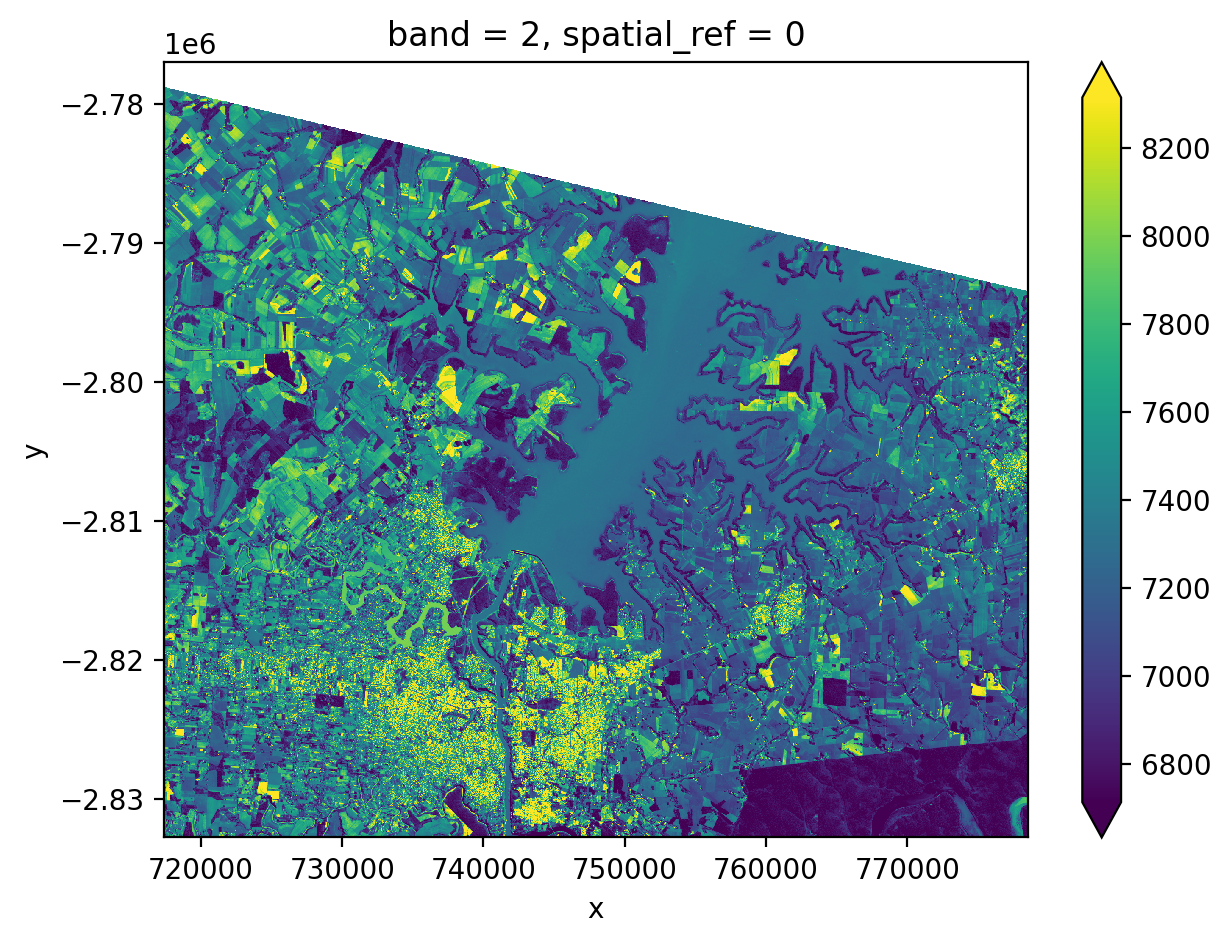

In [2]:
import rioxarray as rxr
import rioxarray.merge
import matplotlib.pyplot as plt

image_path = "../../pygis/data/LC08_L1TP_224078_20200518_20200518_01_RT.TIF"

fig, ax = plt.subplots(dpi=200)

# Extract blue band from the same file twice
src1 = rxr.open_rasterio(image_path).isel(band=1)
src2 = rxr.open_rasterio(image_path).isel(band=1)

# Mosaic with max overlap (use max values where overlap occurs)
src = rioxarray.merge.merge_arrays([src1, src2], method='max')

# Remove 0 values and plot
src.where(src != 0).plot.imshow(robust=True, ax=ax)
plt.tight_layout(pad=1)